## Convolutional Neural Network with Tensorflow on Ciraf dataset

---

In [1]:
# Import libraries 

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline

In [2]:
# Loading the Ciraf10 dataset

# Setting class names in the dataset

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Loading the dataset

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# Image normalization 

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


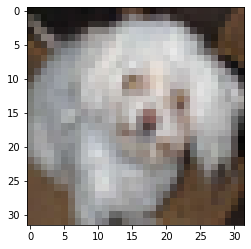

In [7]:
# Show an image

plt.imshow(X_test[1000])

In [8]:
# Building a Convolutional Neural Network

# Defining the model

model = tf.keras.models.Sequential()

In [9]:
# Adding the first convolutional layer

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

In [10]:
# Adding the second convolutional layer and the max-pooling layer

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [11]:
# Adding the third convolutional layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [12]:
#  Adding the fourth convolutional layer and max-pooling layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [13]:
# Adding the flattening layer

model.add(tf.keras.layers.Flatten())

In [14]:
# Adding the first fully-connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [15]:
# Adding the output layer

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [16]:
# Compiling the model

model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [17]:
# Training the model

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.4059 - sparse_categorical_accuracy: 0.4915
Epoch 2/5
1563/1563 [==============================] - 173s 110ms/step - loss: 0.9269 - sparse_categorical_accuracy: 0.6746
Epoch 3/5
1563/1563 [==============================] - 165s 106ms/step - loss: 0.7421 - sparse_categorical_accuracy: 0.7389
Epoch 4/5
1563/1563 [==============================] - 161s 103ms/step - loss: 0.6262 - sparse_categorical_accuracy: 0.7797
Epoch 5/5
1563/1563 [==============================] - 165s 106ms/step - loss: 0.5201 - sparse_categorical_accuracy: 0.8170


In [18]:
# Evaluating the model

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 7s 22ms/step - loss: 0.7989 - sparse_categorical_accuracy: 0.7381
Test accuracy: 0.738099992275238
